# Lightweight networks and MobileNet

We have seen that complex networks require significant computational resources, such as GPU, for training, and also for fast inference. However, it turns out that a model with significantly smaller number of parameters in most cases can still be trained to perform reasonably well. In other words, increase in the model complexity typically results in small (non-proportional) increase in the model performance.

We have observed this in the beginning of the module when training MNIST digit classification. The accuracy of simple dense model was not significantly worse than that of a powerful CNN. Increasing the number of CNN layers and/or number of neurons in the classifier allowed us to gain a few percents of accuracy at most.

This leads us to the idea that we can experiment with Lightweight network architectures in order to train faster models. This is especially important if we want to be able to execute our models on mobile devices.

This module will rely on the Cats and Dogs dataset that we have downloaded in the previous unit. First we will make sure that the dataset is available.

In [1]:
!wget https://raw.githubusercontent.com/MicrosoftDocs/pytorchfundamentals/main/computer-vision-pytorch/pytorchcv.py

--2021-07-18 18:40:17--  https://raw.githubusercontent.com/MicrosoftDocs/pytorchfundamentals/main/computer-vision-pytorch/pytorchcv.py
Resolving raw.githubusercontent.com... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6371 (6.2K) [text/plain]
Saving to: ‘pytorchcv.py.1’

pytorchcv.py.1      100%[===================>]   6.22K  --.-KB/s    in 0s      

2021-07-18 18:40:17 (71.9 MB/s) - ‘pytorchcv.py.1’ saved [6371/6371]



In [2]:
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt
from torchinfo import summary
import os

from pytorchcv import train, display_dataset, train_long, load_cats_dogs_dataset, validate, common_transform

In [3]:
if not os.path.exists("data/kagglecatsanddogs_3367a.zip"):
    !wget -P data -q https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip

dataset, train_loader, test_loader = load_cats_dogs_dataset()

# waht load_cats_dogs_dataset does is:
#
# from PIL import Image
# import glob
# import zipfile
# 
# def check_image(fn):
#     try:
#         im = Image.open(fn)
#         im.verify()
#         return True
#     except:
#         return False
# 
# def check_image_dir(path):
#     for fn in glob.glob(path):
#         if not check_image(fn):
#             print("Corrupt image: {}".format(fn))
#             os.remove(fn)
# 
# def load_cats_dogs_dataset():
#     if not os.path.exists('data/PetImages'):
#         with zipfile.ZipFile('data/kagglecatsanddogs_3367a.zip', 'r') as zip_ref:
#             zip_ref.extractall('data')
#
#     check_image_dir('data/PetImages/Cat/*.jpg')
#     check_image_dir('data/PetImages/Dog/*.jpg')
#
#     dataset = torchvision.datasets.ImageFolder('data/PetImages',transform=common_transform())
#     trainset, testset = torch.utils.data.random_split(dataset,[20000,len(dataset)-20000])
#     trainloader = torch.utils.data.DataLoader(trainset,batch_size=32)
#     testloader = torch.utils.data.DataLoader(trainset,batch_size=32)
#     return dataset, trainloader, testloader

/anaconda/envs/py37_pytorch/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:772: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  "Possibly corrupt EXIF data.  "
/anaconda/envs/py37_pytorch/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:772: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  "Possibly corrupt EXIF data.  "
/anaconda/envs/py37_pytorch/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:772: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  "Possibly corrupt EXIF data.  "
/anaconda/envs/py37_pytorch/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:772: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  "Possibly corrupt EXIF data.  "
/anaconda/envs/py37_pytorch/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:772: UserWarning: Possibly corrupt EXIF data

In [4]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message=r'.*EXIF.*') 

## MobileNet

In the previous unit, we have seen **ResNet** architecture for image classification. More lightweight analog of ResNet is **MobileNet**, which uses so-called *Inverted Residual Blocks*. Let's load pre-trained mobilenet and see how it works:

In [5]:
model = torch.hub.load('pytorch/vision:v0.6.0', 'mobilenet_v2', pretrained=True)
model.eval()
print(model)

Downloading: "https://github.com/pytorch/vision/archive/v0.6.0.zip" to /home/mslearnuser/.cache/torch/hub/v0.6.0.zip
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /home/mslearnuser/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


  0%|          | 0.00/13.6M [00:00<?, ?B/s]

MobileNetV2(
  (features): Sequential(
    (0): ConvBNReLU(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=Tr

Let's apply the model to our dataset and make sure that it works.

In [6]:
sample_image = dataset[0][0].unsqueeze(dim=0)  # unsqueeze: Returns a new tensor with a dimension of size one inserted at the specified position. Here, as a fake batch dimension.
print(f"image shape: {sample_image.size()}")
res = model(sample_image)
print(res[0].argmax())  # res[0]: first sample in batch, that is the sample_image

image shape: torch.Size([1, 3, 224, 224])
tensor(285)


**Exercise:** Compare the number of parameters in MobileNet and full-scale ResNet model.


In [7]:
# Exercise: Compare the number of parameters in MobileNet and full-scale ResNet model.
# params: 3,504,872 (MobileNet v2) v.s. 11,689,512 (ResNet 18)


## Using MobileNet for transfer learning

Now let's perform the same transfer learning process as in previous unit, but using MobileNet. First of all, let's freeze all parameters of the model:

In [8]:
for x in model.parameters():
    x.requires_grad = False

Then, replace the final classifier. We also transfer the model to our default training device (GPU or CPU):

In [9]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model.classifier = nn.Linear(1280, 2)  # parameters in nn.Module: requires_grad
model = model.to(device)
summary(model, input_size=(1, 3, 244, 244))

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [1, 1280, 8, 8]           --
|    └─ConvBNReLU: 2-1                   [1, 32, 122, 122]         --
|    |    └─Conv2d: 3-1                  [1, 32, 122, 122]         (864)
|    |    └─BatchNorm2d: 3-2             [1, 32, 122, 122]         (64)
|    |    └─ReLU6: 3-3                   [1, 32, 122, 122]         --
|    └─InvertedResidual: 2-2             [1, 16, 122, 122]         --
|    |    └─Sequential: 3-4              [1, 16, 122, 122]         (896)
|    └─InvertedResidual: 2-3             [1, 24, 61, 61]           --
|    |    └─Sequential: 3-5              [1, 24, 61, 61]           (5,136)
|    └─InvertedResidual: 2-4             [1, 24, 61, 61]           --
|    |    └─Sequential: 3-6              [1, 24, 61, 61]           (8,832)
|    └─InvertedResidual: 2-5             [1, 32, 31, 31]           --
|    |    └─Sequential: 3-7              [1, 32, 31, 31]           

Now let's do the actual training:

In [10]:
train_long(model,train_loader,test_loader,loss_fn=torch.nn.CrossEntropyLoss(),epochs=1,print_freq=90)

Epoch 0, minibatch 0: train acc = 0.71875, train loss = 0.018540844321250916
Epoch 0, minibatch 90: train acc = 0.9048763736263736, train loss = 0.010095858311915135
Epoch 0, minibatch 180: train acc = 0.9235151933701657, train loss = 0.009636694555124526
Epoch 0, minibatch 270: train acc = 0.933809963099631, train loss = 0.008486509323120117
Epoch 0, minibatch 360: train acc = 0.9407029085872576, train loss = 0.007683967949610998
Epoch 0, minibatch 450: train acc = 0.9438747228381374, train loss = 0.007253121906796474
Epoch 0, minibatch 540: train acc = 0.9466843807763401, train loss = 0.006819550078809813
Epoch 0 done, validation acc = 0.9724, validation loss = 0.00452798843383789


Epoch 0, minibatch 0: train acc = 0.59375, train loss = 0.020962174981832504
Epoch 0 done, validation acc = 0.50005, validation loss = 0.11986976318359376
Epoch 0, minibatch 90: train acc = 0.9223901098901099, train loss = 0.007885346700856975
Epoch 0 done, validation acc = 0.9769, validation loss = 0.001957084846496582
Epoch 0, minibatch 180: train acc = 0.9425069060773481, train loss = 0.005542253262430265
Epoch 0 done, validation acc = 0.97205, validation loss = 0.002384566307067871
Epoch 0, minibatch 270: train acc = 0.9521448339483395, train loss = 0.004686551780278392
Epoch 0 done, validation acc = 0.91715, validation loss = 0.009198502349853515
Epoch 0, minibatch 360: train acc = 0.9551592797783933, train loss = 0.004592469194259009
Epoch 0 done, validation acc = 0.9798, validation loss = 0.0018929311752319336
Epoch 0, minibatch 450: train acc = 0.9584950110864745, train loss = 0.004193630556838211
Epoch 0 done, validation acc = 0.9816, validation loss = 0.0017539100646972656
Ep

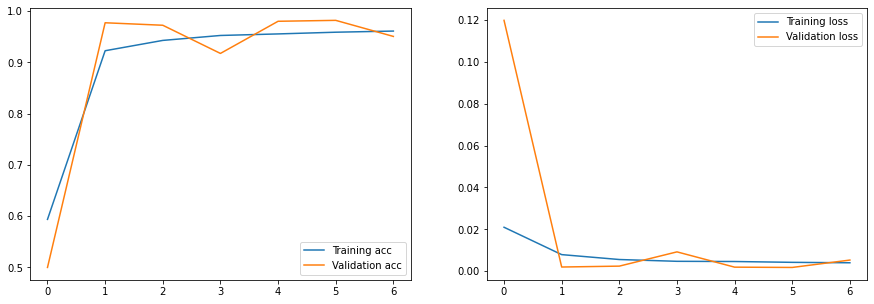

In [11]:
from pytorchcv import plot_results

def train_long(net,train_loader,test_loader,epochs=5,lr=0.01,optimizer=None,loss_fn = nn.NLLLoss(),print_freq=10):
    optimizer = optimizer or torch.optim.Adam(net.parameters(),lr=lr)
    res = { 'train_loss' : [], 'train_acc': [], 'val_loss': [], 'val_acc': []}  # add res to record history
    for epoch in range(epochs):
        net.train()
        total_loss,acc,count = 0,0,0
        for i, (features,labels) in enumerate(train_loader):
            lbls = labels.to(device)
            optimizer.zero_grad()
            out = net(features.to(device))
            loss = loss_fn(out,lbls)
            loss.backward()
            optimizer.step()
            total_loss+=loss
            _,predicted = torch.max(out,1)
            acc+=(predicted==lbls).sum()
            count+=len(labels)
            if i%print_freq==0:
                print("Epoch {}, minibatch {}: train acc = {}, train loss = {}".format(epoch,i,acc.item()/count,total_loss.item()/count))
                vl,va = validate(net,test_loader,loss_fn)  # validate every print_freq
                print("Epoch {} done, validation acc = {}, validation loss = {}".format(epoch,va,vl))  # validate every print_freq
                res['train_loss'].append(total_loss.item()/count)  # add res to record history
                res['train_acc'].append(acc.item()/count)  # add res to record history
                res['val_loss'].append(vl)  # add res to record history
                res['val_acc'].append(va)  # add res to record history
    return res

model.classifier = nn.Linear(1280, 2).to(device)  # reset classifier param

hist = train_long(model, train_loader, test_loader, loss_fn=torch.nn.CrossEntropyLoss(), epochs=1, print_freq=90)

plot_results(hist)

## Takeaway

Notice that MobileNet results in almost the same accuracy as VGG-16, and just slightly lower than full-scale ResNet. 

The main advantage of small models, such as MobileNet or ResNet-18 is that they can be used on mobile devices. [Here](https://pytorch.org/mobile/android/) is official example of using ResNet-18 on Android device, and [here](https://heartbeat.fritz.ai/pytorch-mobile-image-classification-on-android-5c0cfb774c5b) is similar example using MobileNet. 